# Importing Libraries

In this section, we import all necessary libraries for data manipulation, visualization, and modeling.

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pip install plotly.express
import plotly.express as px
%pip install seaborn
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

In this section, we perform initial data analysis to understand the dataset.

In [62]:
dataset = pd.read_csv('IRIS.csv')

In [63]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
species = dataset['species'].value_counts().reset_index()
print(species)

             index  species
0      Iris-setosa       50
1  Iris-versicolor       50
2   Iris-virginica       50


### Creating Heatmap of Feature Correlations

We create a heatmap to visualize the correlations between different features of the dataset.

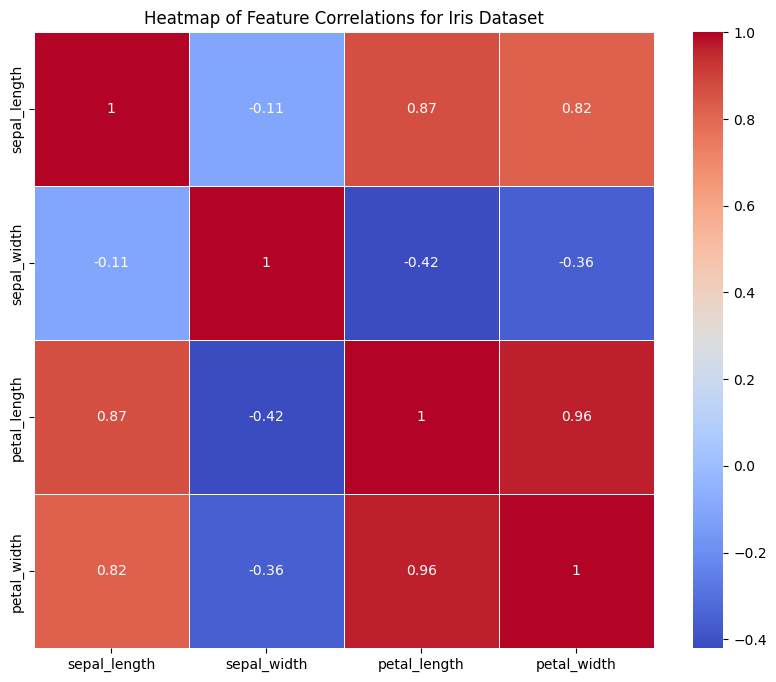

In [65]:
dataset_numeric = dataset.drop(columns=['species'])

correlation_matrix = dataset_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Feature Correlations for Iris Dataset')

plt.show()

### Visualization of chosen feature pairs

Here, we visualize pairs of features to observe potential patterns and relationships.

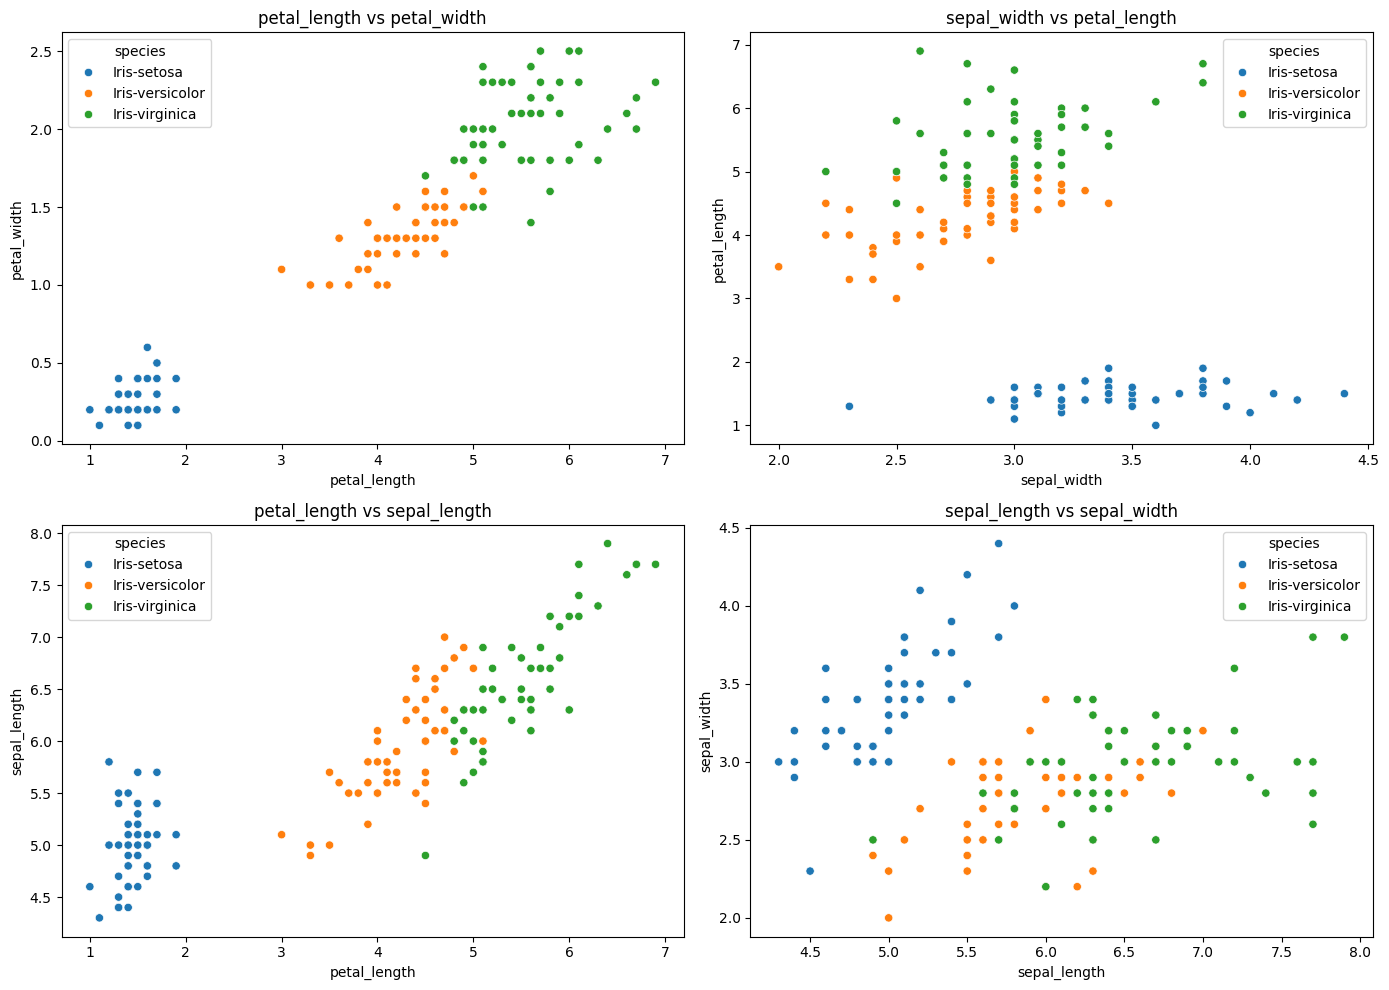

In [66]:
plt.figure(figsize=(14, 10))

#The highest positive correlation
plt.subplot(2, 2, 1)
sns.scatterplot(data=dataset, x='petal_length', y='petal_width', hue='species')
plt.title('petal_length vs petal_width')

#The lowest negative correlation
plt.subplot(2, 2, 2)
sns.scatterplot(data=dataset, x='sepal_width', y='petal_length', hue='species')
plt.title('sepal_width vs petal_length')

plt.subplot(2, 2, 3)
sns.scatterplot(data=dataset, x='petal_length', y='sepal_length', hue='species')
plt.title('petal_length vs sepal_length')

plt.subplot(2, 2, 4)
sns.scatterplot(data=dataset, x='sepal_length', y='sepal_width', hue='species')
plt.title('sepal_length vs sepal_width')

plt.tight_layout()
plt.show()

# Preprocessing

In this section, we preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables and feature scaling.

In [67]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return cm, accuracy

# Models

We will build and evaluate several classification models.

## Logistic Regression

We start with Logistic Regression, a simple yet effective classification algorithm.

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [72]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

## K-Nearest Neighbors (KNN)

Next, we implement K-Nearest Neighbors, a non-parametric method used for classification.

In [73]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [74]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

## Decision Tree

We also explore Decision Tree, a model that splits the data into subsets based on feature value.

In [75]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [76]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

## Random forest

Random Forest, an ensemble method that combines multiple decision trees, is used to improve prediction accuracy.

In [77]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [78]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

## Support Vector Machine

Support Vector Machine, a powerful classifier that works well on high-dimensional spaces, is also implemented.

In [79]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [80]:
evaluate_model(y_test, y_pred)

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64),
 1.0)

## k-Fold Cross Validation

To ensure the robustness of our models, we perform k-Fold Cross Validation. This technique helps in assessing how the results of the models will generalize to an independent dataset. By averaging the results over k iterations, we get a more reliable estimate of the model's performance.

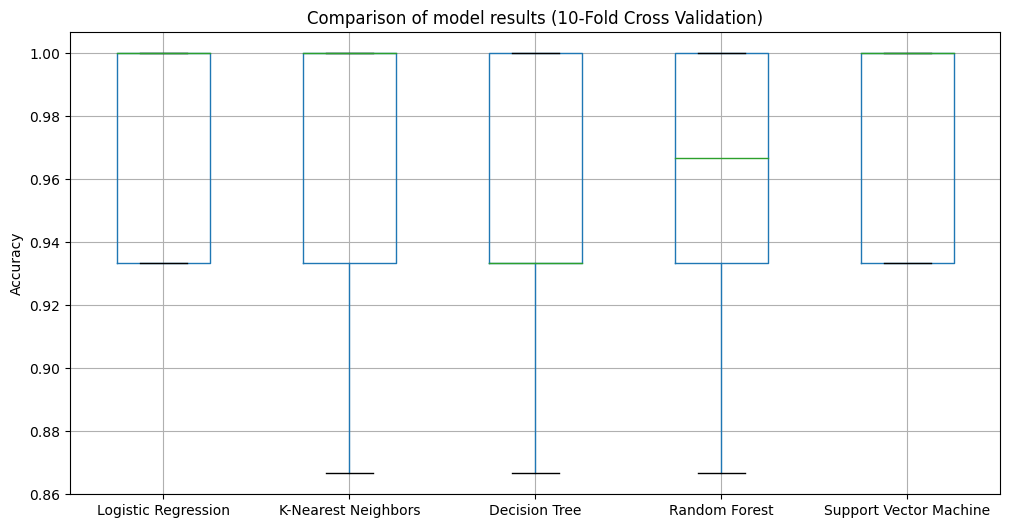

Logistic Regression       0.973333
K-Nearest Neighbors       0.966667
Decision Tree             0.953333
Random Forest             0.960000
Support Vector Machine    0.973333
dtype: float64

In [60]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10)
    results[model_name] = cv_scores

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
results_df.boxplot()
plt.title('Comparison of model results (10-Fold Cross Validation)')
plt.ylabel('Accuracy')
plt.show()

results_df.mean()